In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

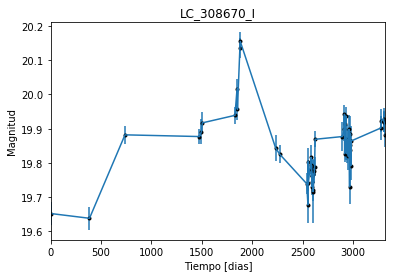

In [2]:
data = np.genfromtxt('LC_308670_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_308670_I')
plt.savefig("LC_308670_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

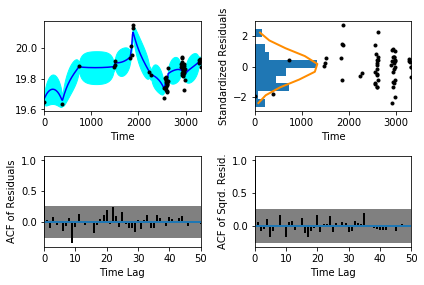

In [5]:
sample.assess_fit()

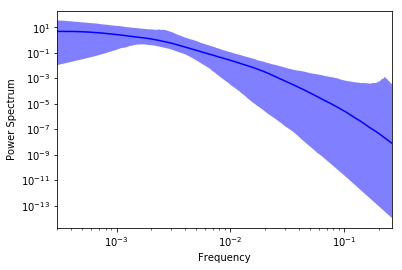

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

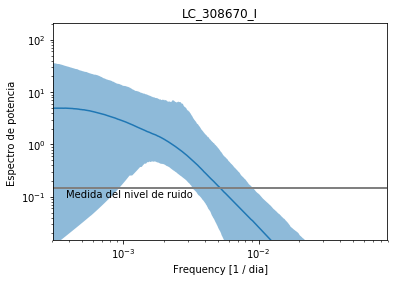

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_308670_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_308670_I')

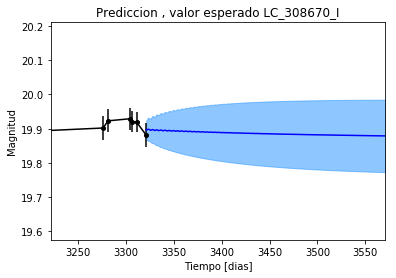

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_308670_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_308670_I')

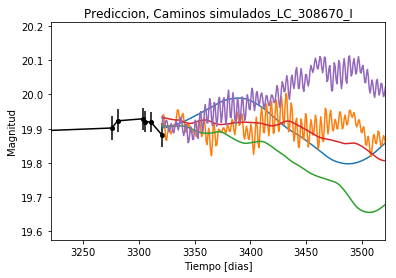

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_308670_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


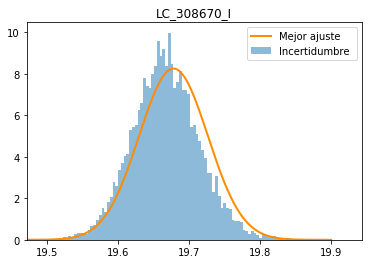

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_308670_I')
plt.savefig("Mejor_ajuste_LC_308670_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_308670_I')

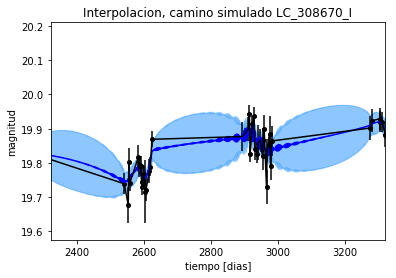

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_308670_I')

Text(0.5,1,'Interpolacion, camino simulado LC_308670_I')

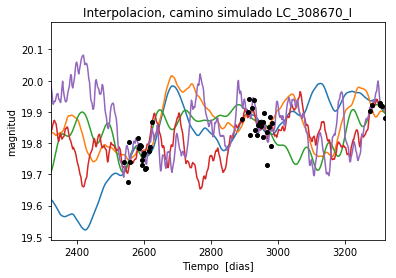

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_308670_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 518.633717865
Median: 0.0100912563729
Standard deviation: 0.101012248546
68% credibility interval: [ 0.00095876  0.1032351 ]
95% credibility interval: [  3.55375146e-04   3.93660920e-01]
99% credibility interval: [  3.08129261e-04   4.93120253e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 614.241532564
Median: 0.0033578770061
Standard deviation: 0.04512306581
68% credibility interval: [ 0.00056513  0.03054928]
95% credibility interval: [ 0.00032751  0.15108979]
99% credibility interval: [  3.06894501e-04   3.08742433e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 382.235858745
Median: 0.0230049974784
Standard dev

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1169.37588116
Median: 103.00195261
Standard deviation: 1.82402660201
68% credibility interval: [ 101.03260693  104.29980129]
95% credibility interval: [  98.2986465   106.06222197]
99% credibility interval: [  96.27997039  106.83272461]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 652.545444978
Median: 0.506136519372
Standard deviation: 1.17716485837
68% credibility interval: [ 0.07945036  2.2381688 ]
95% credibility interval: [ 0.01930607  4.11985561]
99% credibility interval: [ 0.01228029  5.25035871]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 406.331658669
Median: 0.364720378386
Standard deviation: 2.46942666592
68% credibility interval: [ 0.01560201  3.52031983]
95% credibility interval: [  1.26066167e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1605.47884463
Median: 1.13418933635e-17
Standard deviation: 2.64794131378e+110
68% credibility interval: [  3.05895747e-93   1.66632824e+55]
95% credibility interval: [  1.57224541e-121   6.85908916e+099]
99% credibility interval: [  2.79179103e-138   8.64120642e+109]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1700.53949173
Median: 19.8448080424
Standard deviation: 0.0584458091331
68% credibility interval: [ 19.79588061  19.89101355]
95% credibility interval: [ 19.71493487  19.95442815]
99% credibility interval: [ 19.64194735  20.01761734]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1337.17905029
Median: 0.0196885618858
Standard deviation: 0.134749499324
68% credibility interval: [ 0.          0.24567178]
95% credibility interval: [ 0.          0.44657677]
99% credibility interval: [ 0.          0.50258867]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1337.17905029
Median: 0.0196885618858
Standard deviation: 0.134749499324
68% credibility interval: [ 0.          0.24567178]
95% credibility interval: [ 0.          0.44657677]
99% credibility interval: [ 0.          0.50258867]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 749.336378728
Median: 0.0
Standard deviation: 0.000971751579905
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1169.37588116
Median: 103.00195261
Standard deviation: 1.82402660201
68% credibility interval: [ 101.03260693  104.29980129]
95% credibility interval: [  98.2986465   106.06222197]
99% credibility interval: [  96.27997039  106.83272461]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1611.03138537
Median: 0.0195708935664
Standard deviation: 0.0191574079172
68% credibility interval: [ 0.0116199   0.03540754]
95% credibility interval: [ 0.00779494  0.06988208]
99% credibility interval: [ 0.00582039  0.12682791]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1029.33368466
Median: 1.1579840566
Standard deviation: 0.205875819485
68% credibility interval: [ 0.97518249  1.37130626]
95% credibility interval: [ 0.81619007  1.64927022]
99% credibility interval: [ 0.74623293  1.79594091]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 600.050181069
Median: 8.30114794711e-05
Standard deviation: 0.0219871797608
68% credibility interval: [  3.33944074e-59   4.72104534e-03]
95% credibility interval: [  1.17341762e-103   5.79094435e-002]
99% credibility interval: [  1.78053975e-112   1.51505421e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 518.633717865
Median: (-0.0634052337734-0.0925739812474j)
Standard deviation: 1.05813209469
68% credibility interval: [-0.64864528+0.j         -0.00602404-0.08641729j]
95% credibility interval: [ -2.47344451e+00+0.j          -2.23288790e-03-0.51628752j]
99% credibility interval: [ -3.09836593e+00+0.j          -1.93603324e-03-0.00145523j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 614.241532564
Median: (-0.021098163468+0.640960013557j)
Standard deviation: 0.892865141901
68% credibility interval: [-0.19194680+0.24566059j -0.00355085+0.j        ]
95% credibility interval: [-0.94932516+2.36370489j -0.00205779+0.00439075j]
99% credibility interval: [ -1.93988592e+00+2.72031113j  -1.92827502e-03+0.02242977j]
Posterior s